In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
csv_file = "Superstore.csv"
df = pd.read_csv("D:\sample\Intership data\Superstore.csv", encoding='latin1')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,09-11-2013,12-11-2013,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,13-06-2013,17-06-2013,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,11-10-2012,18-10-2012,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [4]:
conn = sqlite3.connect("sales_data.db")
df.to_sql("sales", conn, if_exists="replace", index=False)

9994

In [5]:
import pandas as pd
print(df.head())
print(pd.read_sql_query("PRAGMA table_info(sales);", conn))

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
1       2  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
2       3  CA-2013-138688  13-06-2013  17-06-2013    Second Class    DV-13045   
3       4  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   
4       5  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [7]:
query = """
SELECT Product_Name AS product,
SUM(Qty) AS total_qty,
SUM(Qty * Unit_Price) AS revenue
FROM sales
GROUP BY Product_Name """

In [8]:
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
1       2  CA-2013-152156  09-11-2013  12-11-2013    Second Class    CG-12520   
2       3  CA-2013-138688  13-06-2013  17-06-2013    Second Class    DV-13045   
3       4  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   
4       5  US-2012-108966  11-10-2012  18-10-2012  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [9]:
query = """
SELECT "Product Name" AS product,
SUM(Quantity) AS total_qty,
SUM(Quantity * Sales) AS revenue
FROM sales
GROUP BY "Product Name"
"""
summary_df = pd.read_sql_query(query, conn)

In [11]:
print("Sales Summary:")
print(summary_df)

Sales Summary:
                                                product  total_qty   revenue
0     "While you Were Out" Message Book, One Form pe...          8    68.264
1              #10 Gummed Flap White Envelopes, 100/Box         11   125.552
2                         #10 Self-Seal White Envelopes         10   463.562
3            #10 White Business Envelopes,4 1/8 x 9 1/2         32  2820.600
4               #10- 4 1/8" x 9 1/2" Recycled Envelopes         37  1366.936
...                                                 ...        ...       ...
1836  iKross Bluetooth Portable Keyboard + Cell Phon...         24  3268.200
1837                         iOttie HLCRIO102 Car Mount         12   879.560
1838                                iOttie XL Car Mount         14  1695.152
1839  invisibleSHIELD by ZAGG Smudge-Free Screen Pro...         29  1975.302
1840                 netTALK DUO VoIP Telephone Service         26  5668.920

[1841 rows x 3 columns]


C:\Users\Sandesh AK\AppData\Local\Temp\ipykernel_31360\1774638752.py:6: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sandesh AK\AppData\Local\Temp\ipykernel_31360\1774638752.py:6: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sandesh AK\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sandesh AK\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


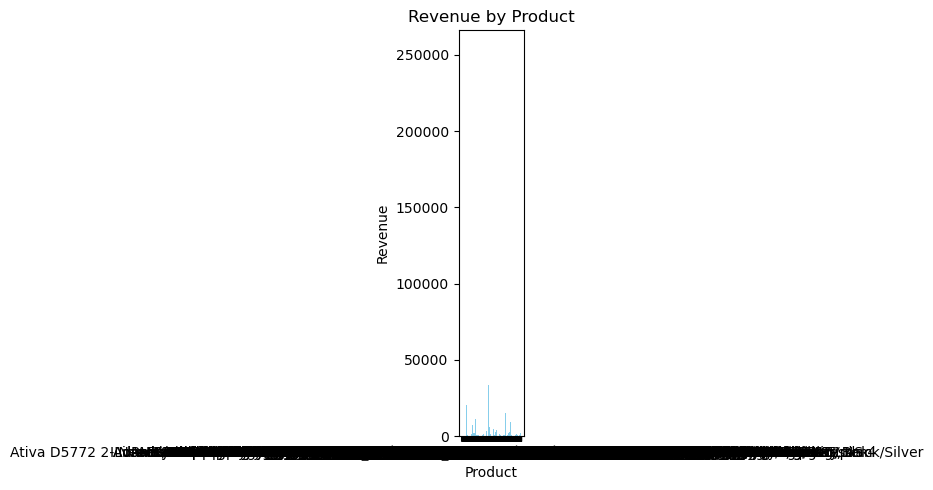

In [12]:
plt.figure(figsize=(8, 5))
plt.bar(summary_df['product'], summary_df['revenue'], color='skyblue')
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.title("Revenue by Product")
plt.tight_layout()
plt.show()

In [13]:
query = """
SELECT "Product Name" AS product,
SUM(Quantity) AS total_qty,
SUM(Quantity * Sales) AS revenue
FROM sales
GROUP BY "Product Name"
"""
summary_df = pd.read_sql_query(query, conn)
display(summary_df)

,product,total_qty,revenue
0,"""While you Were Out"" Message Book, One Form pe...",8,68.264
1,"#10 Gummed Flap White Envelopes, 100/Box",11,125.552
2,#10 Self-Seal White Envelopes,10,463.562
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",32,2820.600
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37,1366.936
...,...,...,...
1836,iKross Bluetooth Portable Keyboard + Cell Phon...,24,3268.200
1837,iOttie HLCRIO102 Car Mount,12,879.560
1838,iOttie XL Car Mount,14,1695.152
1839,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,29,1975.302


In [14]:
import sqlite3
import pandas as pd

In [15]:
df['quantity'] = 1

In [26]:
if 'quantity' in df.columns:
    df=df.drop(columns=['quantity'])

conn=sqlite3.connect("sales_data.db")
df.to_sql("sales",conn,
 if_exists="replace", index=False)

9994

In [27]:
query = """
SELECT "Product Name" AS product,
SUM(Quantity) AS total_qty,
SUM(Quantity * Sales) AS revenue
FROM sales
GROUP BY "Product Name"
"""
summary_df = pd.read_sql_query(query, conn)

In [28]:
print(summary_df.head())

                                             product  total_qty   revenue
0  "While you Were Out" Message Book, One Form pe...          8    68.264
1           #10 Gummed Flap White Envelopes, 100/Box         11   125.552
2                      #10 Self-Seal White Envelopes         10   463.562
3         #10 White Business Envelopes,4 1/8 x 9 1/2         32  2820.600
4            #10- 4 1/8" x 9 1/2" Recycled Envelopes         37  1366.936


In [29]:
display(summary_df)

,product,total_qty,revenue
0,"""While you Were Out"" Message Book, One Form pe...",8,68.264
1,"#10 Gummed Flap White Envelopes, 100/Box",11,125.552
2,#10 Self-Seal White Envelopes,10,463.562
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",32,2820.600
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37,1366.936
...,...,...,...
1836,iKross Bluetooth Portable Keyboard + Cell Phon...,24,3268.200
1837,iOttie HLCRIO102 Car Mount,12,879.560
1838,iOttie XL Car Mount,14,1695.152
1839,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,29,1975.302


C:\Users\Sandesh AK\AppData\Local\Temp\ipykernel_31360\3168855692.py:7: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sandesh AK\AppData\Local\Temp\ipykernel_31360\3168855692.py:7: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sandesh AK\AppData\Local\Temp\ipykernel_31360\3168855692.py:7: UserWarning: Glyph 65535 (\uffff) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sandesh AK\AppData\Local\Temp\ipykernel_31360\3168855692.py:7: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\Sandesh AK\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65535 (\uffff) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Sandesh AK\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 148 (\x94) m

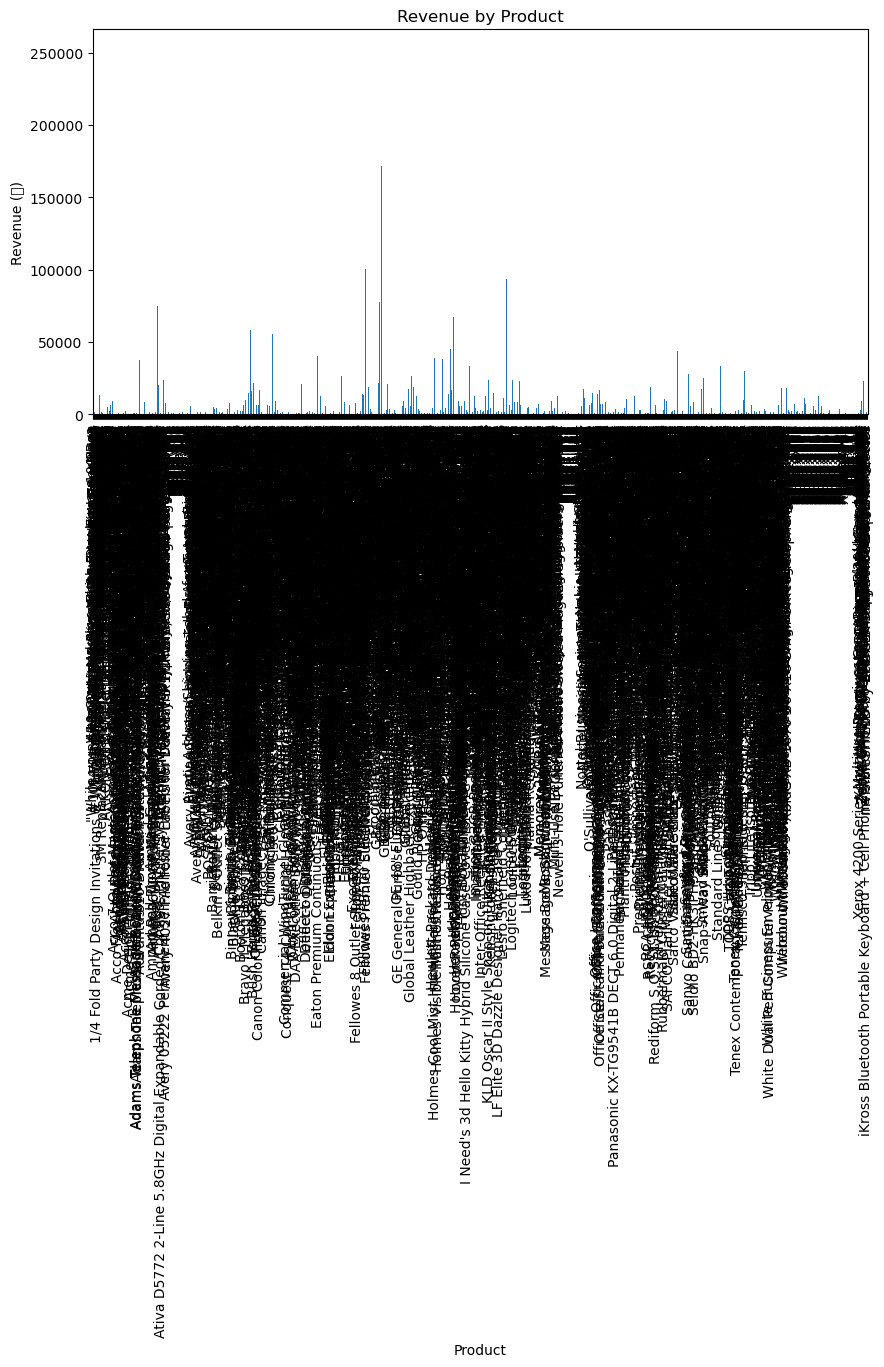

In [31]:
import matplotlib.pyplot as plt

summary_df.plot(kind='bar', x='product', y='revenue', figsize=(10,5),legend=False)
plt.xlabel("Product")
plt.ylabel("Revenue (￿)")
plt.title("Revenue by Product")
plt.tight_layout()
plt.show()

C:\Users\Sandesh AK\AppData\Local\Temp\ipykernel_31360\3957103817.py:5: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sandesh AK\AppData\Local\Temp\ipykernel_31360\3957103817.py:5: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sandesh AK\AppData\Local\Temp\ipykernel_31360\3957103817.py:5: UserWarning: Glyph 65535 (\uffff) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Sandesh AK\AppData\Local\Temp\ipykernel_31360\3957103817.py:5: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\Sandesh AK\AppData\Local\Temp\ipykernel_31360\3957103817.py:6: UserWarning: Glyph 148 (\x94) missing from font(s) DejaVu Sans.
  plt.savefig("sales_chart.png")
C:\Users\Sandesh AK\AppData\Local\Temp\ipykernel_31360\3957103817.py:6: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sa

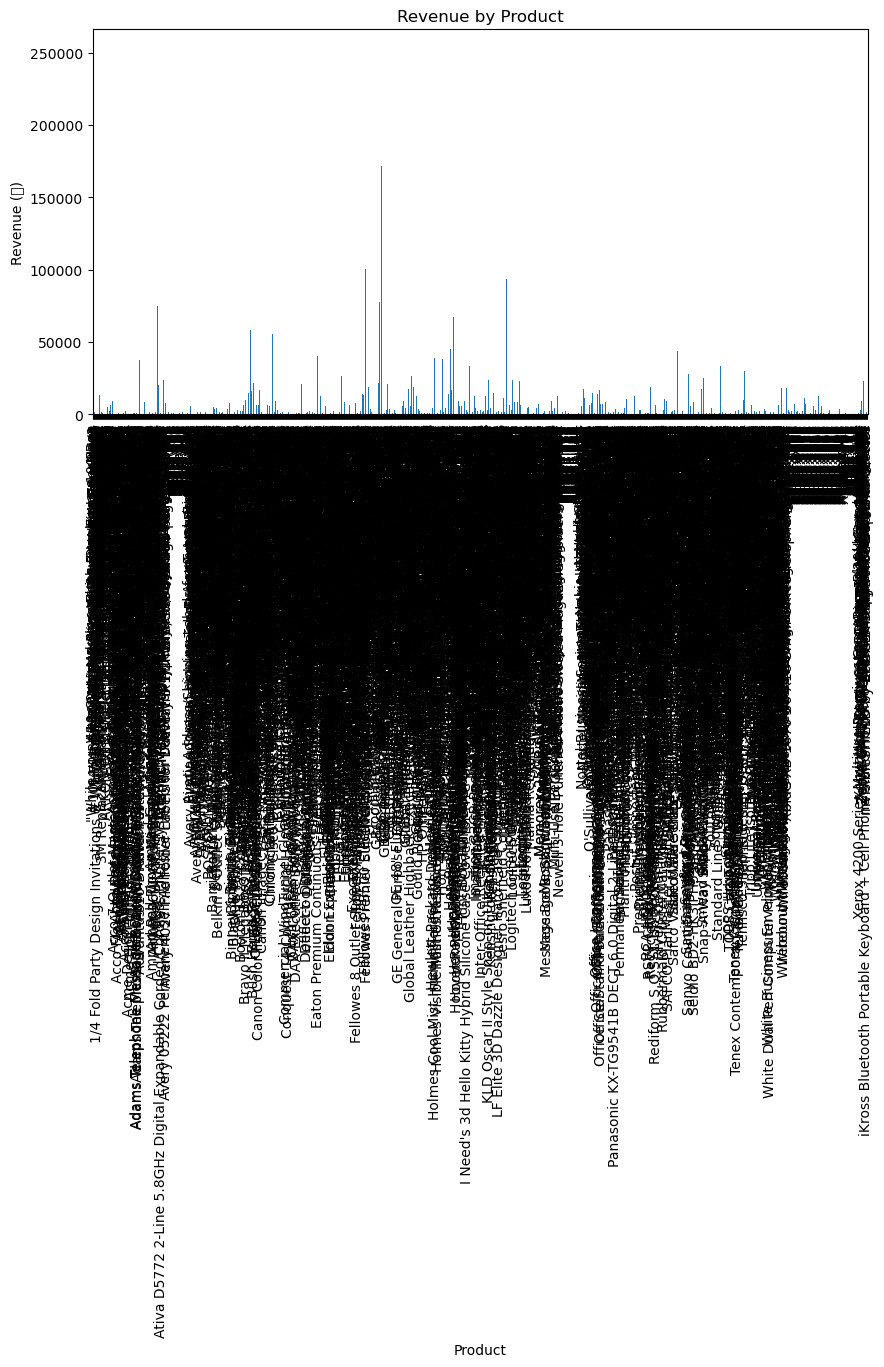

In [32]:
summary_df.plot(kind='bar', x='product', y='revenue', figsize=(10,5),legend=False)
plt.xlabel("Product")
plt.ylabel("Revenue (￿)")
plt.title("Revenue by Product")
plt.tight_layout()
plt.savefig("sales_chart.png")
plt.show()

In [34]:
from IPython.display import FileLink, display
display(FileLink("sales_chart.png"))

C:\Users\Sandesh AK\Documents\sales_chart.png

In [35]:
conn.close()